# Amazon Fine Food Sentiment Analysis

## Context

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

In [24]:
import warnings
warnings.filterwarnings('ignore')

## NLTK Basics 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

In [26]:
data = pd.read_csv("Reviews.csv")

In [27]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [28]:
df = data.sample(n=500)

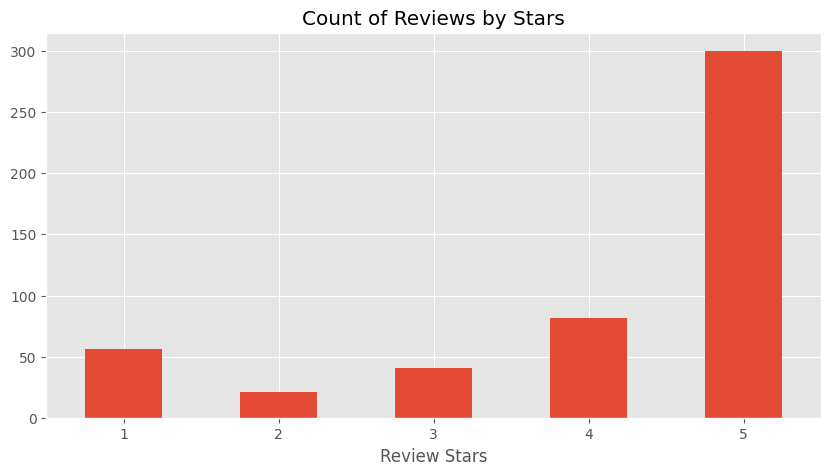

In [29]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()

In [30]:
review = df.sample(1).Text.iloc[0]  
print(review)

BEST TEA - TRY IT WITH LEMON - EXCELENT TEA AND COSTUMER SEVICE- FASY DELIVERY ALSO


In [31]:
tokens = nltk.word_tokenize(review)
tokens[:10]

['BEST', 'TEA', '-', 'TRY', 'IT', 'WITH', 'LEMON', '-', 'EXCELENT', 'TEA']

In [32]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('BEST', 'NNP'),
 ('TEA', 'NNP'),
 ('-', ':'),
 ('TRY', 'VB'),
 ('IT', 'NNP'),
 ('WITH', 'NNP'),
 ('LEMON', 'NNP'),
 ('-', ':'),
 ('EXCELENT', 'NNP'),
 ('TEA', 'NNP')]

In [33]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  BEST/NNP
  (ORGANIZATION TEA/NNP)
  -/:
  TRY/VB
  IT/NNP
  WITH/NNP
  (ORGANIZATION LEMON/NNP)
  -/:
  (ORGANIZATION EXCELENT/NNP)
  TEA/NNP
  AND/NNP
  (ORGANIZATION COSTUMER/NNP)
  SEVICE-/NNP
  FASY/NNP
  (ORGANIZATION DELIVERY/NNP)
  ALSO/NNP)


## Sentiement Scoring using Vader

In [34]:
sia = SentimentIntensityAnalyzer()

In [35]:
sia.polarity_scores('Wow! That was just fascinating!')

{'neg': 0.0, 'neu': 0.276, 'pos': 0.724, 'compound': 0.8353}

In [36]:
sia.polarity_scores('This is the worst I ever seen.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [37]:
sia.polarity_scores(review)

{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}

In [38]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [39]:
vaders = pd.DataFrame(res).T \
        .reset_index().rename(columns={'index': 'Id'}) \
        .merge(df, how='left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,98868,0.000,0.736,0.264,0.9728,B000Y2CI9U,A2XDRDXPO68ZIZ,"Kimberly Norberto ""mystampstore""",1,1,5,1284336000,Strogalicious!,"Hi Everyone,<br /> We love the Annie's Beef S..."
1,337022,0.000,0.743,0.257,0.9877,B004CYLWGQ,A1PM0LSZTA99PE,Sara H.,6,7,2,1295049600,Not As Good As Before,Saw this in the grocery store recently and was...
2,18561,0.034,0.809,0.157,0.9348,B003ANJ9SI,A2EWHU3RB2Z3YR,Kay,1,1,4,1335052800,My picky dog enjoys eating it,"My dog, a Great Pyrenees, has a few food aller..."
3,39247,0.000,0.847,0.153,0.8176,B005EX6K2K,AKTS2GDYS46RR,debbed36,0,0,4,1327881600,Great conversation piece,I used these at a party for a neurosurgeon. I...
4,37335,0.025,0.759,0.216,0.9846,B003CK2BQG,AK7CAW3N1XZV6,"Beth Cholette ""doctor_beth""",2,2,5,1172534400,Wonderful mix of green tea and chai flavor,I like drinking green tea for the health benef...


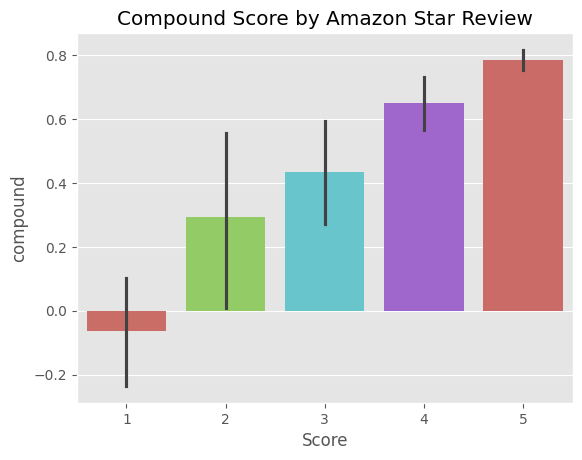

In [40]:
ax = sns.barplot(data=vaders, x='Score', y='compound', hue='Score',palette='hls', legend=False) 
ax.set_title('Compound Score by Amazon Star Review')
plt.show()

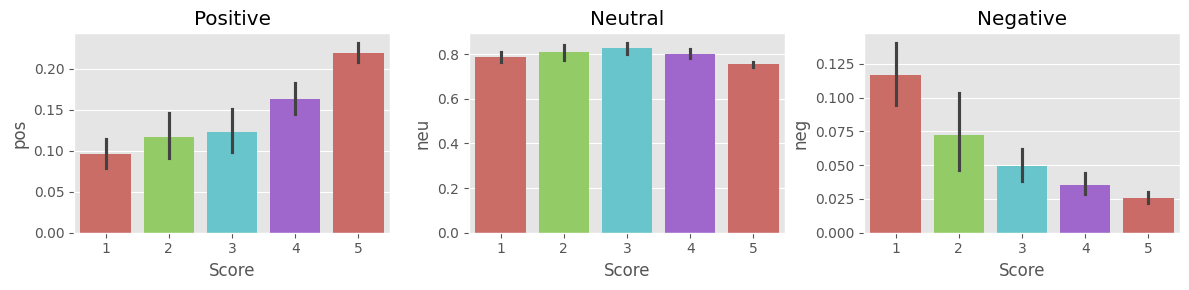

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0],hue='Score',palette='hls', legend=False)
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1],hue='Score',palette='hls', legend=False)
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2],hue='Score',palette='hls', legend=False)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Roberta Pretrained Model
- Use a model trained of a large corpus of data.
- 
Transformer model accounts for the words but also the context related to other words.

In [42]:
import transformers

In [43]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [44]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

`VADER` on review 

In [45]:
print(review)
sia.polarity_scores(review)

BEST TEA - TRY IT WITH LEMON - EXCELENT TEA AND COSTUMER SEVICE- FASY DELIVERY ALSO


{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'compound': 0.6369}

`Roberta` on review

In [47]:
encoded_text = tokenizer(review, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.010955464, 'roberta_neu': 0.7050112, 'roberta_pos': 0.2840334}


In [48]:
def polarity_scores_roberta(review):
    encoded_text = tokenizer(review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [49]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 266068
Broke for id 413554
Broke for id 98566
Broke for id 101483


In [50]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Comparing Scores

In [51]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

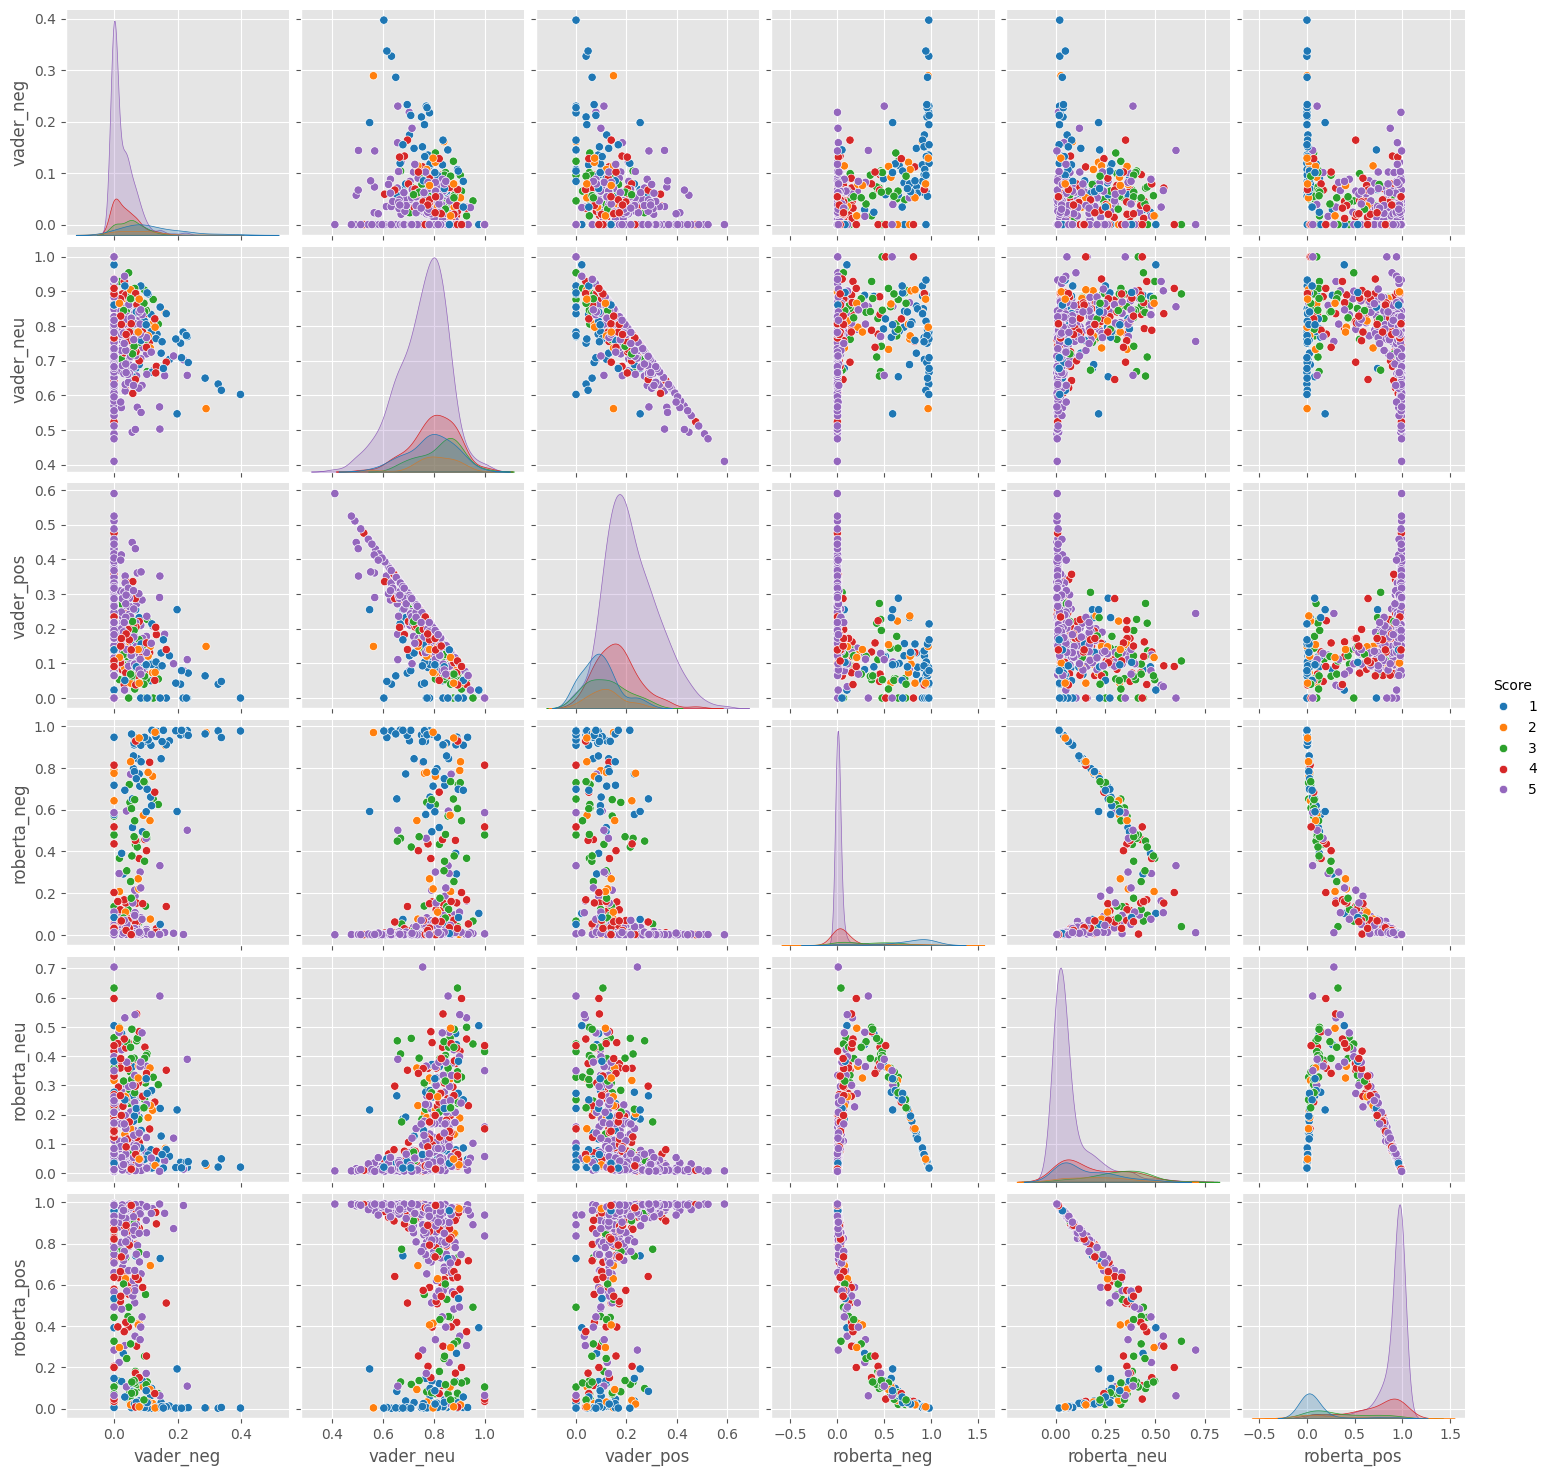

In [52]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()